In [107]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

def flat_unique(path='data/arxiv_metadata.json'):
    with open(path) as f:
        paper_meta = json.load(f)

    all_papers = []
    ids = []
    for papers in paper_meta.values():
        for paper in papers:
            all_papers.append(paper)
            ids.append(paper['id'])

    filled_ids = {id_: False for id_ in ids}
    all_unique_papers = []
    for paper in all_papers:
        if not filled_ids[paper['id']]:
            all_unique_papers.append(paper)
            filled_ids[paper['id']] = True
            
    return all_unique_papers

In [3]:
papers = flat_unique()
summaries = [paper['summary'].replace('\n', ' ') for paper in papers]

In [4]:
sample = summaries[10]

import gensim

def tokenize(text):
    """Removes stop words and lowers"""
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(token.lower())
            
    return result

In [5]:
# Choosing not to lemmatize as most interesting words are concepts
tokenized = tokenize(sample)
#dictionary = gensim.corpora.Dictionary(tokenized)

In [ ]:
tokenized[:10]

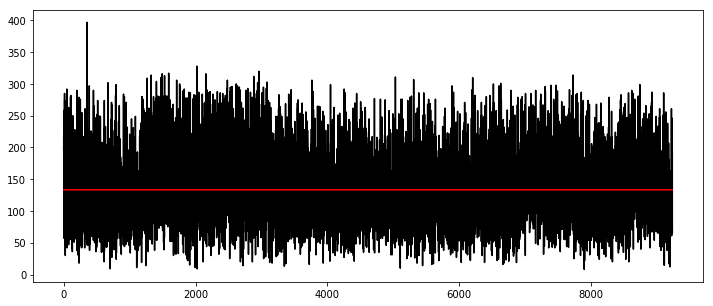

In [8]:
summary_len = [len(summary.split()) for summary in summaries]

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(summary_len, color='k')
plt.plot([np.array(summary_len).mean()]*len(summary_len), color='r')
plt.show()

# pretty solid 130 words

In [20]:
titles = [paper['title'] for paper in papers]
cnt = 0
for title in titles:
    processed = title.replace(' ',  '')
    if 'ing' in processed or 'ion' in processed:
        cnt += 1
        
print(cnt, len(titles), cnt/len(titles))

6854 9232 0.7424176776429809


In [135]:
import os
import preprocessing
from gensim import corpora

texts = preprocessing.corpus_tokens()
dictionary = corpora.Dictionary(texts)

In [136]:
#print(dictionary.token2id)
corpus = [dictionary.doc2bow(text) for text in texts]

In [133]:
"""import copy

corpus_smaller = []
for cnt, text_corp in enumerate(corpus):
    corpus.append([])
    for tup in text_corp:
        pass
"""

'import copy\n\ncorpus_smaller = []\nfor cnt, text_corp in enumerate(corpus):\n    corpus.append([])\n    for tup in text_corp:\n        pass\n'

In [137]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 41139
Number of documents: 291


In [ ]:
from gensim.models import LdaModel, LdaMulticore

# Set training parameters.
num_topics = 40
chunksize = 500 # size of the doc looked at every pass
passes = 50 # number of passes through documents
iterations = 1000
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

# Run multicore LDA model
%time model = LdaMulticore(corpus=corpus, id2word=id2word, chunksize=chunksize, num_topics=num_topics, passes=passes, iterations=iterations)

In [143]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pyLDAvis.gensim.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
13     14.552114        1       1  0.125517 -0.034924
17     14.449122        1       2  0.153279 -0.083652
18     11.522868        1       3  0.125990 -0.043663
9       7.814034        1       4  0.129302 -0.041979
19      6.928934        1       5 -0.010437  0.120985
4       6.421608        1       6  0.101111 -0.015891
2       6.373662        1       7  0.099661 -0.041127
16      4.787850        1       8  0.055979  0.036763
12      4.007100        1       9  0.018562  0.048661
10      3.759361        1      10  0.015356  0.034655
8       3.069399        1      11  0.019433 -0.016269
0       2.992814        1      12 -0.009856  0.011433
14      2.672120        1      13  0.030074 -0.016520
11      2.661447        1      14 -0.061182  0.033759
5       2.255492        1      15 -0.086651  0.149403
6       1.792116        1      16 -0.097285  0.141577
7       1.335897        1      17 -0.037053 -0.023896
3       1.314922        1      18 -0.018601 -0.117157
15      1.006288        1      19 -0.210053  0.071185
1       0.282857        1      20 -0.343148 -0.213342, topic_info=      Category          Freq  \
term                           
1240   Default   7010.000000   
1288   Default   3962.000000   
601    Default   3533.000000   
538    Default   7701.000000   
491    Default   4765.000000   
1204   Default   4161.000000   
1004   Default   1234.000000   
912    Default   2523.000000   
3195   Default   1651.000000   
941    Default    922.000000   
1270   Default   3105.000000   
1323   Default   2349.000000   
524    Default   1591.000000   
1905   Default    964.000000   
544    Default   6784.000000   
431    Default   2288.000000   
442    Default  10535.000000   
432    Default   5877.000000   
1388   Default   1239.000000   
1356   Default   3847.000000   
1395   Default   9154.000000   
542    Default   4332.000000   
725    Default   2962.000000   
675    Default   1575.000000   
3196   Default   1024.000000   
1444   Default   4407.000000   
2019   Default   2608.000000   
3392   Default   2007.000000   
3291   Default   2010.000000   
489    Default    894.000000   
...        ...           ...   
30503  Topic20      2.948726   
31035  Topic20      2.948725   
7037   Topic20      4.696168   
3114   Topic20     77.528145   
7058   Topic20     13.431310   
7081   Topic20     12.272339   
7044   Topic20     35.339787   
7078   Topic20      6.411638   
990    Topic20     19.820869   
1004   Topic20     67.291313   
5836   Topic20      5.832562   
941    Topic20     53.178444   
2940   Topic20     18.337200   
5705   Topic20     21.292477   
3012   Topic20     11.567892   
1270   Topic20     22.438557   
19140  Topic20      4.700610   
574    Topic20     10.350696   
1906   Topic20     10.937757   
5844   Topic20      7.569031   
248    Topic20     10.086847   
538    Topic20     13.369459   
1638   Topic20      8.813790   
362    Topic20      8.718495   
680    Topic20      7.074055   
3122   Topic20      7.093420   
1799   Topic20      7.670276   
43     Topic20      6.723520   
2186   Topic20      6.452748   
1155   Topic20      6.123735   

                                                    Term         Total  \
term                                                                     
1240                                              option   7010.000000   
1288                                                rate   3962.000000   
601                                                 risk   3533.000000   
538                                                price   7701.000000   
491                                                order   4765.000000   
1204                                              market   4161.000000   
1004                                             default   1234.000000   
912                                                asset   2523.000000   
3195        